In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [3]:
def generateDataXor(n_samples):
    """ 
    generates a 2D linearly separable dataset with n samples. 
    The third element of the sample is the label
    """
    xb = (rand(n_samples*2, 2)) 
    
    lab = np.zeros(n_samples*2)
    
    lab[((xb[:,0] < 0.5) & (xb[:,1]>0.5)) | ((xb[:,0]>0.5) & (xb[:,1]<0.5))] = 1
    
    
    return xb, lab 

 
def plot_data(net, x_test, y_test, title_str):
    fig = figure()
    coords_A = x_test[y_test == 1]
    coords_B = x_test[y_test != 1]

    scatter(coords_A[:,0], coords_A[:,1], c='r', label='Class 1')
    scatter(coords_B[:,0], coords_B[:,1], c='b', label='Class 0')

    legend()

    title(title_str)

    return fig


#### XOR

In [4]:
X, y = generateDataXor(100000)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
print (y)

[1. 1. 1. ... 0. 0. 1.]


### Network 1

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 140000 samples
Epoch 1/30
140000/140000 [==============================] - 3s 23us/sample - loss: 0.6984 - accuracy: 0.5030
Epoch 2/30
140000/140000 [==============================] - 3s 19us/sample - loss: 0.6933 - accuracy: 0.4904
Epoch 3/30
140000/140000 [==============================] - 3s 19us/sample - loss: 0.6933 - accuracy: 0.4867
Epoch 4/30
140000/140000 [==============================] - 3s 19us/sample - loss: 0.6932 - accuracy: 0.4949
Epoch 5/30
140000/140000 [==============================] - 3s 18us/sample - loss: 0.6932 - accuracy: 0.4943
Epoch 6/30
140000/140000 [==============================] - 3s 22us/sample - loss: 0.6932 - accuracy: 0.4810
Epoch 7/30
140000/140000 [==============================] - 3s 23us/sample - loss: 0.6932 - accuracy: 0.5004
Epoch 8/30
140000/140000 [==============================] - 3s 19us/sample - loss: 0.6932 - accuracy: 0.4858
Epoch 9/30
140000/

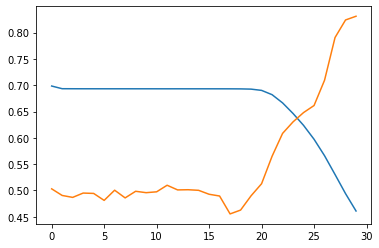

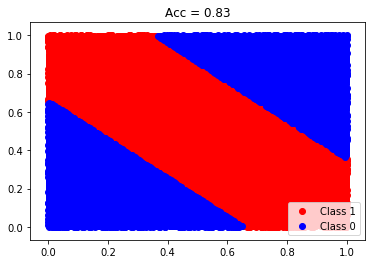

In [9]:
### Multilayer perceprton

network = models.Sequential()
network.add(layers.Dense(2, activation='sigmoid', input_shape=(2,)))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

plot_model(network, to_file='model.png')
history = network.fit(x_train, y_train, epochs=30, batch_size=128)
ev = network.evaluate(x_test, y_test)

figure()
plot( history.history['loss'])
plot( history.history['accuracy'])

y_test_pred = network.predict(x_test)[:, 0]
y_test_pred_int = np.round(y_test_pred)
fig = plot_data(network, x_test, y_test_pred_int, 'Acc = %.2f' % ev[1])
fig.savefig('figures/MLP_n1_xor_train.png', dpi=300)

### Network 2

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 140000 samples
Epoch 1/60
140000/140000 [==============================] - 4s 32us/sample - loss: 0.7132 - accuracy: 0.5276
Epoch 2/60
140000/140000 [==============================] - 3s 24us/sample - loss: 0.6889 - accuracy: 0.5651
Epoch 3/60
140000/140000 [==============================] - 3s 25us/sample - loss: 0.6730 - accuracy: 0.5173
Epoch 4/60
140000/140000 [==============================] - 3s 24us/sample - loss: 0.6347 - accuracy: 0.5109
Epoch 5/60
140000/140000 [==============================] - 3s 24us/sample - loss: 0.5892 - accuracy: 0.5107
Epoch 6/60
140000/140000 [==============================] - 3s 23us/sample - loss: 0.5523 - accuracy: 0.5208
Epoch 7/60
140000/140000 [==============================] - 3s 23us/sample - loss: 0.5247 - accuracy: 0.5253
Epoch 8/60
140000/140000 [==============================] - 3s 24us/sample - loss: 0.5045 - accuracy: 0.5335
Epoch 9/60
140000/

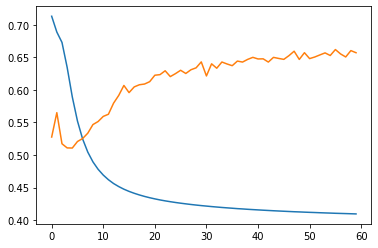

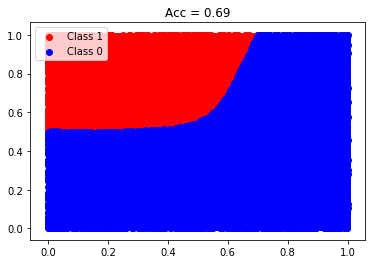

In [10]:
### Multilayer perceprton

network = models.Sequential()
network.add(layers.Dense(2, activation='sigmoid', input_shape=(2,)))
network.add(layers.Dense(4, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

plot_model(network, to_file='model.png')
history = network.fit(x_train, y_train, epochs=60, batch_size=128)
ev = network.evaluate(x_test, y_test)

figure()
plot( history.history['loss'])
plot( history.history['accuracy'])

y_test_pred = network.predict(x_test)[:, 0]
y_test_pred_int = np.round(y_test_pred)
fig = plot_data(network, x_test, y_test_pred_int, 'Acc = %.2f' % ev[1])
fig.savefig('figures/MLP_n2_xor_train.png', dpi=300)

### Network 3

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 140000 samples
Epoch 1/30
140000/140000 [==============================] - 3s 20us/sample - loss: 0.6948 - accuracy: 0.5033
Epoch 2/30
140000/140000 [==============================] - 2s 16us/sample - loss: 0.6931 - accuracy: 0.5052
Epoch 3/30
140000/140000 [==============================] - 2s 16us/sample - loss: 0.6924 - accuracy: 0.5248
Epoch 4/30
140000/140000 [==============================] - 2s 16us/sample - loss: 0.6879 - accuracy: 0.5707
Epoch 5/30
140000/140000 [==============================] - 2s 16us/sample - loss: 0.6598 - accuracy: 0.6232
Epoch 6/30
140000/140000 [==============================] - 2s 16us/sample - loss: 0.5958 - accuracy: 0.6593
Epoch 7/30
140000/140000 [==============================] - 2s 17us/sample - loss: 0.4851 - accuracy: 0.7906
Epoch 8/30
140000/140000 [==============================] - 2s 18us/sample - loss: 0.3925 - accuracy: 0.8318
Epoch 9/30
140000/

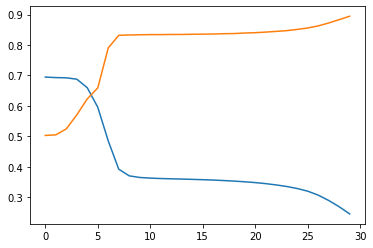

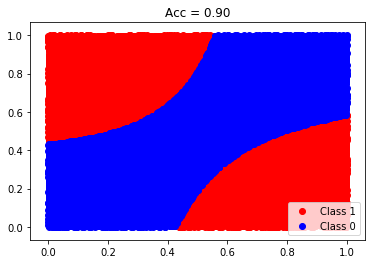

In [11]:
### Multilayer perceprton

network = models.Sequential()
network.add(layers.Dense(4, activation='sigmoid', input_shape=(2,)))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

plot_model(network, to_file='model.png')
history = network.fit(x_train, y_train, epochs=30, batch_size=128)
ev = network.evaluate(x_test, y_test)

figure()
plot( history.history['loss'])
plot( history.history['accuracy'])

y_test_pred = network.predict(x_test)[:, 0]
y_test_pred_int = np.round(y_test_pred)
fig = plot_data(network, x_test, y_test_pred_int, 'Acc = %.2f' % ev[1])
fig.savefig('figures/MLP_n3_xor_train.png', dpi=300)